In [ ]:
%pip install music21

In [1]:
import os
from music21 import converter, pitch, interval, instrument, note, stream, meter
from matplotlib import pyplot as plt

from xen.data.SongData import SongDataSet
from xen.codecs.NoteSequenceSparseCodec import NoteSequenceSparseCodec
from xen.codecs.NoteSequenceFlatCodec import NoteSequenceFlatCodec
from xen.visualise import plotPart, plotMeasures, plotSparseNoteSequence

data_dir = "../../../ai/trainingdata/music/130000_Pop_Rock_Classical_Videogame_EDM_MIDI_Archive[6_19_15]/C/C/"
data_file = "Chrono Trigger - Robo Theme.mid"

dataset = SongDataSet.fromMidiPaths([data_dir + data_file])

# print(f'Loaded {len(dataset.songs)} Songs') 

IntProgress(value=0, max=1)

Label(value='')

Loaded 1 songs


Length: 64.0
Robo Theme


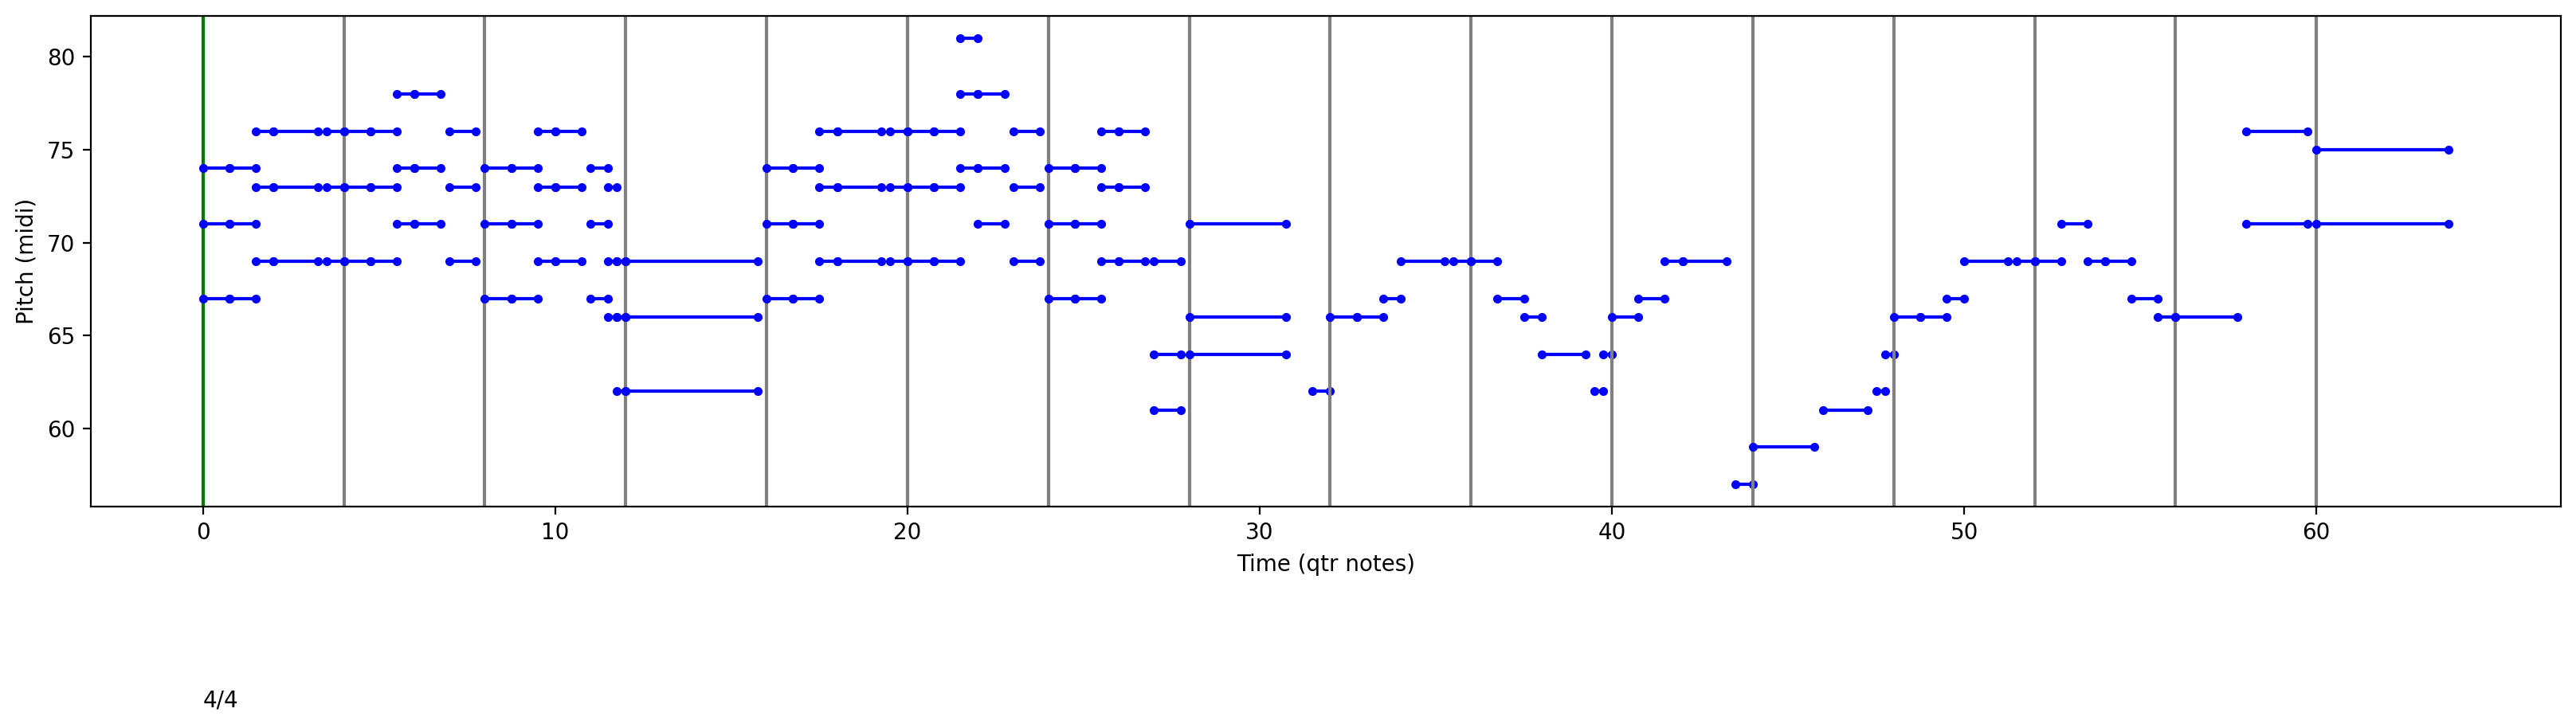

Length: 64.0
by G-Han


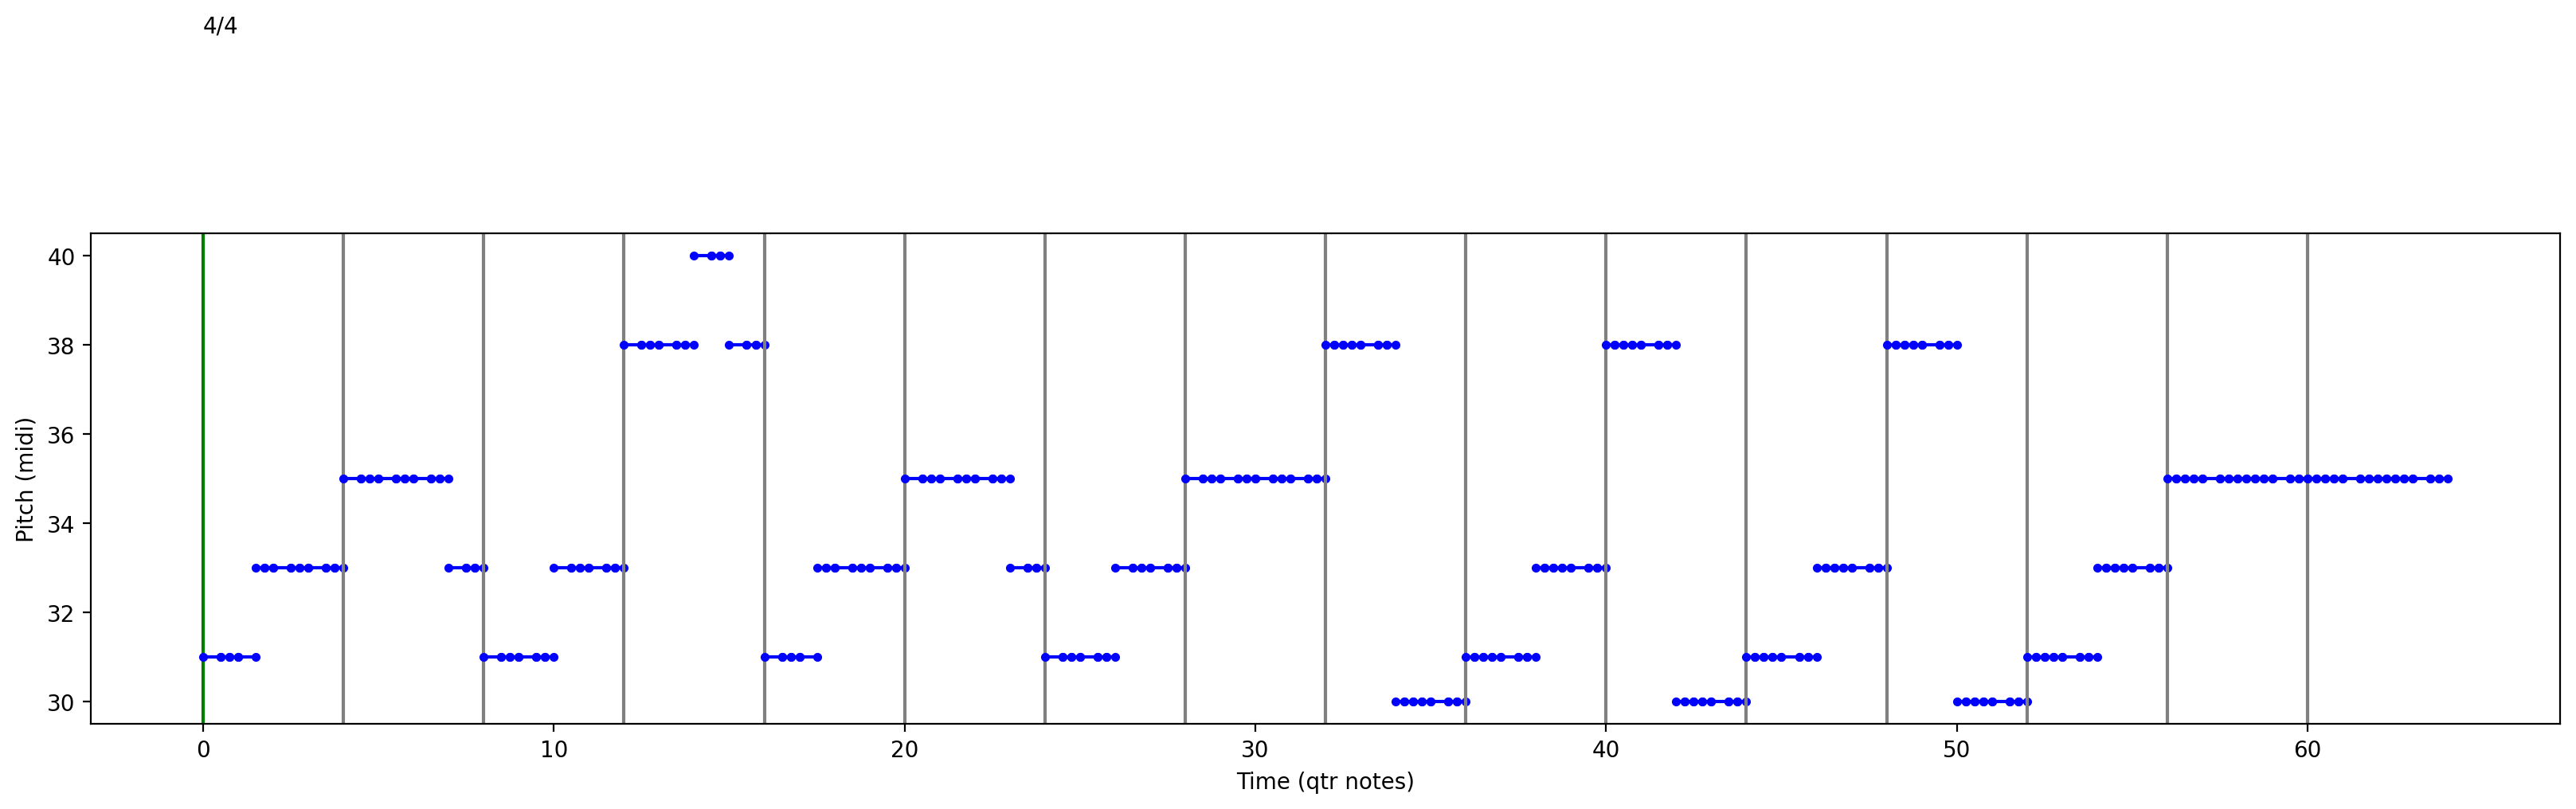

In [2]:
for part in dataset.songs[0].score.getElementsByClass(stream.Part):
    # part = part.chordify()
    print(f'Length: {part.duration.quarterLength}')
    plotPart(part)

# scores[0].show()

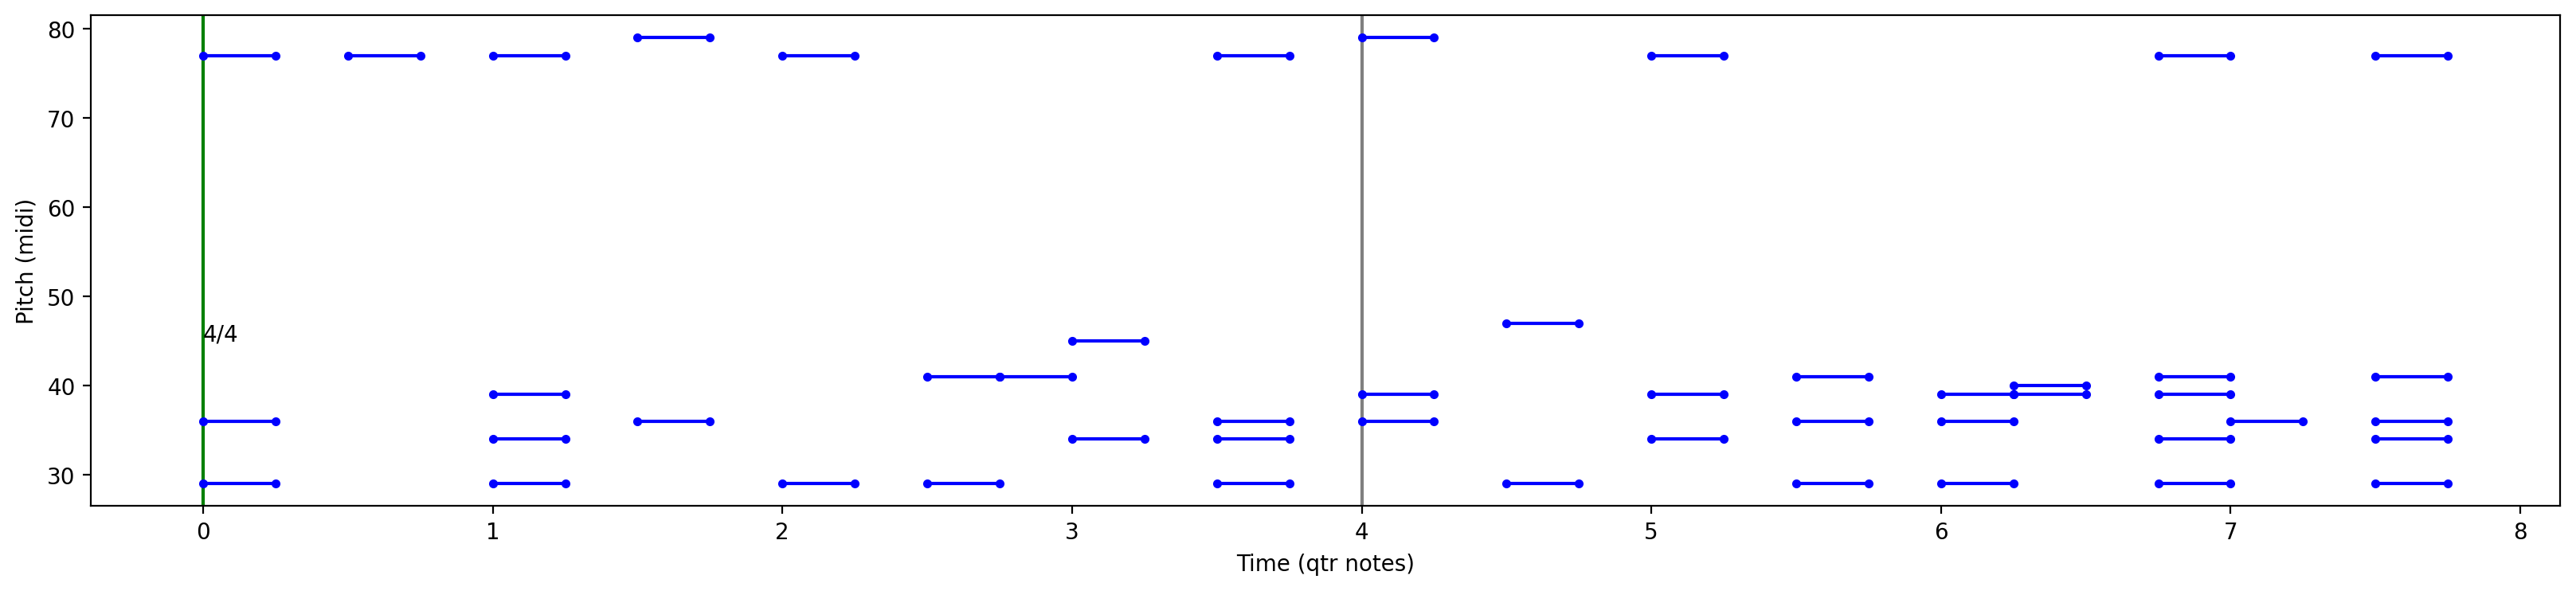

In [6]:
for part in dataset.songs[0].score.getElementsByClass(stream.Part):
    measures = part.getElementsByClass(stream.Measure)
    plotMeasures(measures[0:4])
        

Encoded 32 sequences
(32, 16, 128)


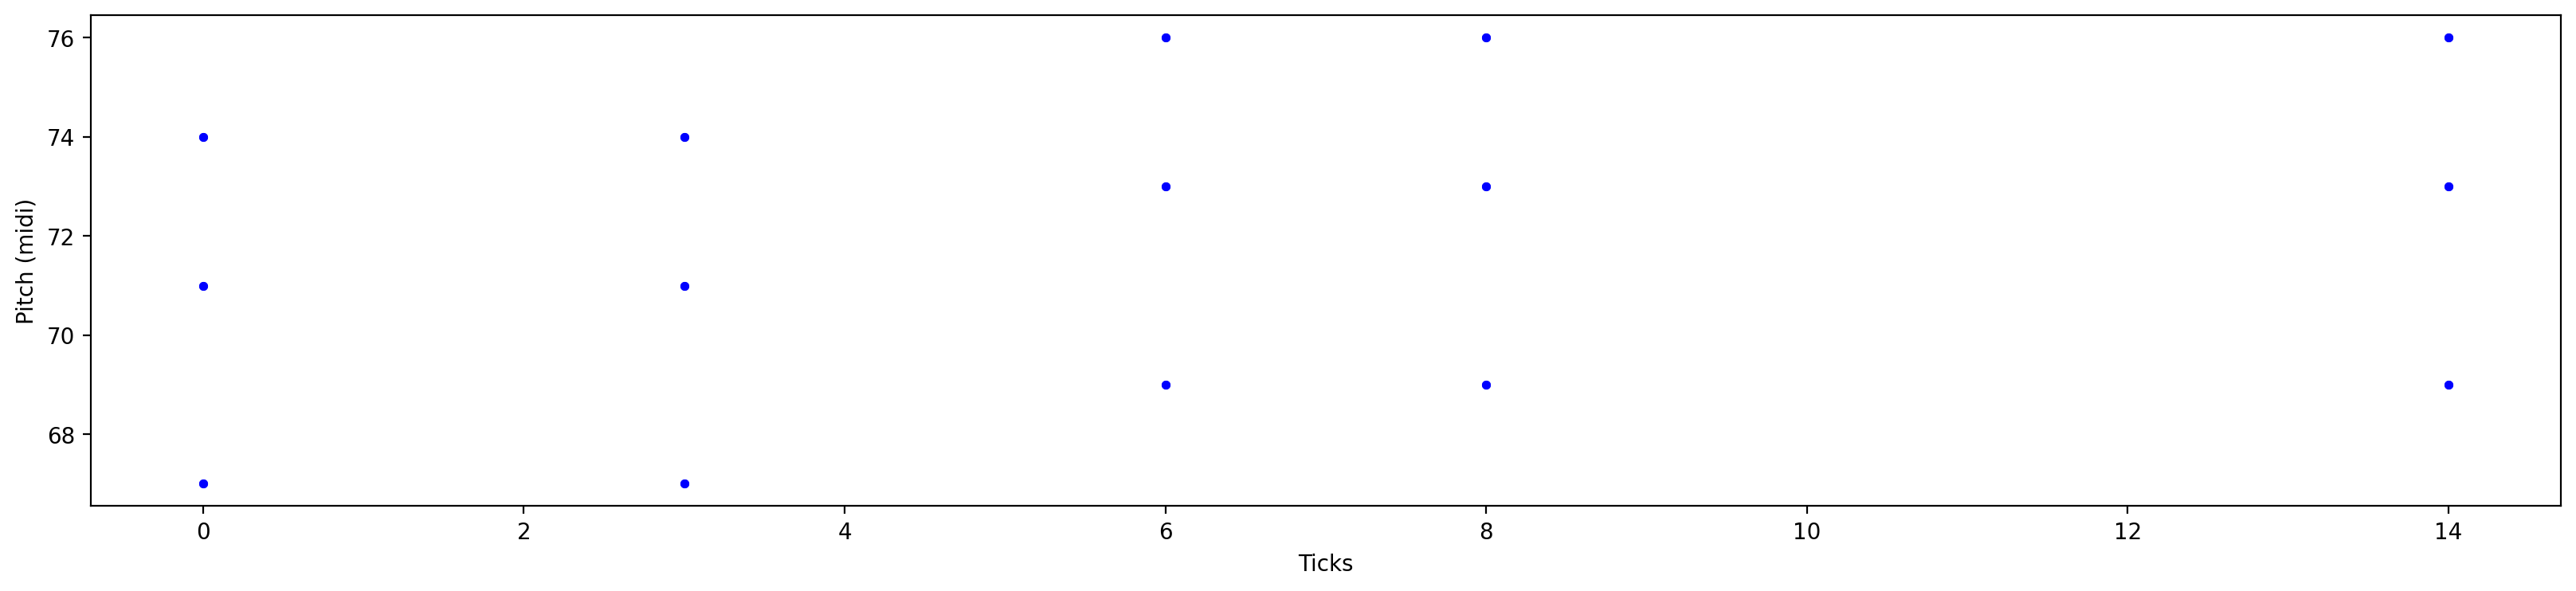

Encoded 32 sequences
(32, 16, 128)


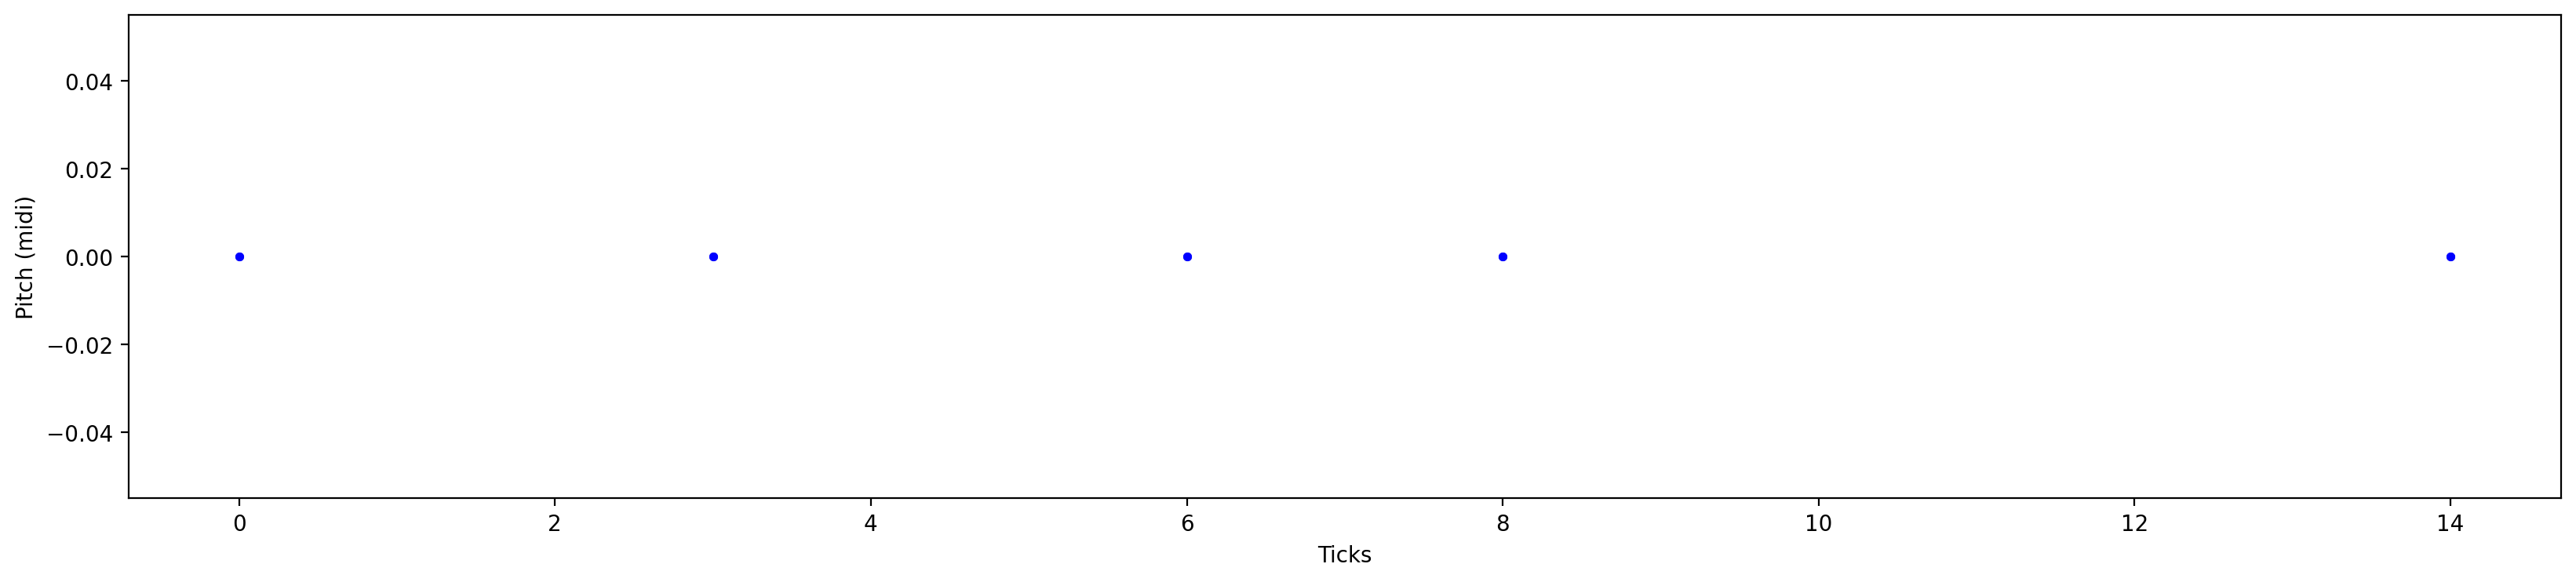

In [3]:
from xen.data.PercussionMap import PercussionMap

quartersPerMeasure = 4
ticksPerQuarter = 4 # 4 = 16th notes, 12 = 16th notes + triplets

codec = NoteSequenceSparseCodec(ticksPerQuarter=ticksPerQuarter, quartersPerMeasure=quartersPerMeasure, timesignature='4/4')
codec.encodeAll(dataset)

print(dataset.sequences.shape)
plotSparseNoteSequence(dataset.sequences[0])

codec = NoteSequenceSparseCodec(ticksPerQuarter=ticksPerQuarter, quartersPerMeasure=quartersPerMeasure, timesignature='4/4', percussionMap=PercussionMap())
codec.encodeAll(dataset)

print(dataset.sequences.shape)
plotSparseNoteSequence(dataset.sequences[0])

In [ ]:
import numpy as np

measuresPerSequence = 4
ticksPerQuarter = 4 # 4 = 16th notes, 12 = 16th notes + triplets

codec = NoteSequenceSparseCodec(ticksPerQuarter=ticksPerQuarter, quartersPerMeasure=quartersPerMeasure, timesignature='4/4')
codec.encodeAll(dataset)

print(dataset.sequences.shape)

decoded = codec.decode(np.array([dataset.sequences[0]]))
plotSparseNoteSequence(decoded[0])